In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
!pwd

/home/daniil/aspirant/real_units/simulations/all in one/s_1.25_5_to_0.0025_new_12


In [3]:
data = pd.read_csv('velocityZcomp.profile', sep = ' ', usecols=[0, 3, 4, 5], skiprows=[2])
arr = np.array(data)
data = pd.DataFrame(data = arr)

/tmp/ipykernel_2948/215459752.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('velocityZcomp.profile', sep = ' ', usecols=[0, 3, 4, 5], skiprows=[2])


In [36]:
data1 = pd.read_csv('s_density_medium.profile', sep = ' ', usecols=[6], skiprows=[2])
arr = np.array(data1)
data1 = pd.DataFrame(data = arr)

FileNotFoundError: [Errno 2] No such file or directory: 's_density_medium.profile'

In [ ]:
data2 = pd.read_csv('b_density_medium.profile', sep = ' ', usecols=[6], skiprows=[2])
arr = np.array(data2)
data2 = pd.DataFrame(data = arr)

In [4]:
data3 = pd.read_csv('pressure_temp_density_medium.profile', sep = ' ', usecols=[5, 7], skiprows=[2])
arr = np.array(data3)
data3 = pd.DataFrame(data = arr)

In [ ]:
data3.head()

In [ ]:
#print(data[0])

In [5]:
begins = []
tmp = 0
for i in data[0]:
    if i == i:
        if i != '#':
            begins.append(tmp)
    tmp+=1
#print(begins)
#tmp = len(begins)
#print(begins[tmp-2])
#for i in range(10):
#    print(i)       

50
0.0
142682.1225


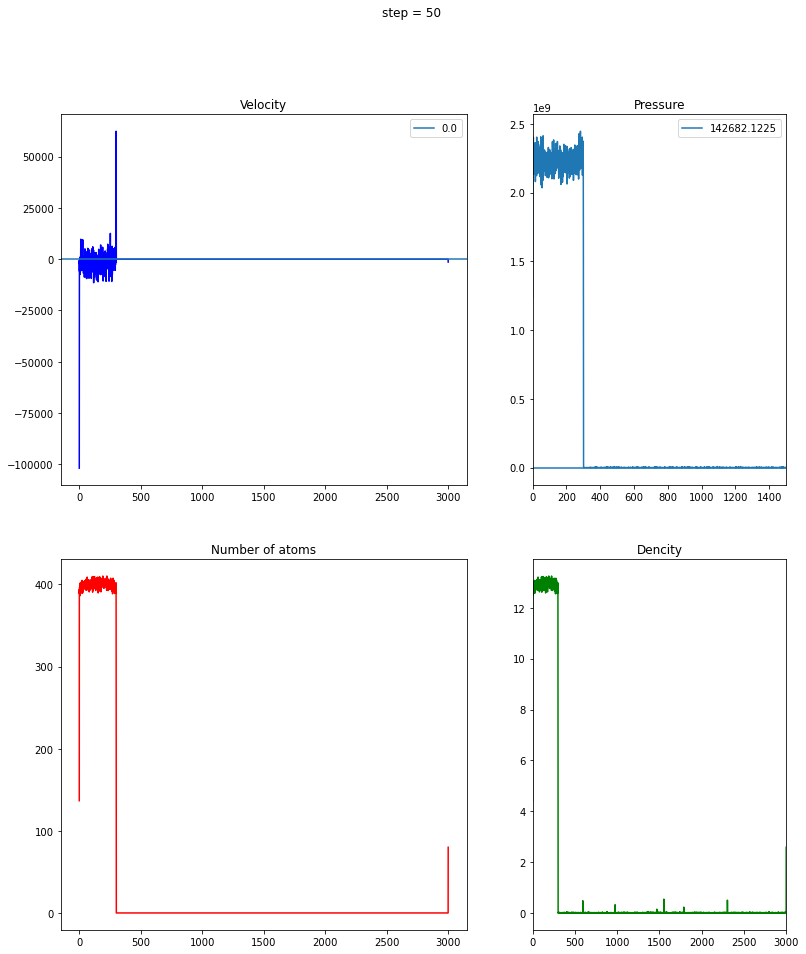

100
0.0
147943.2075


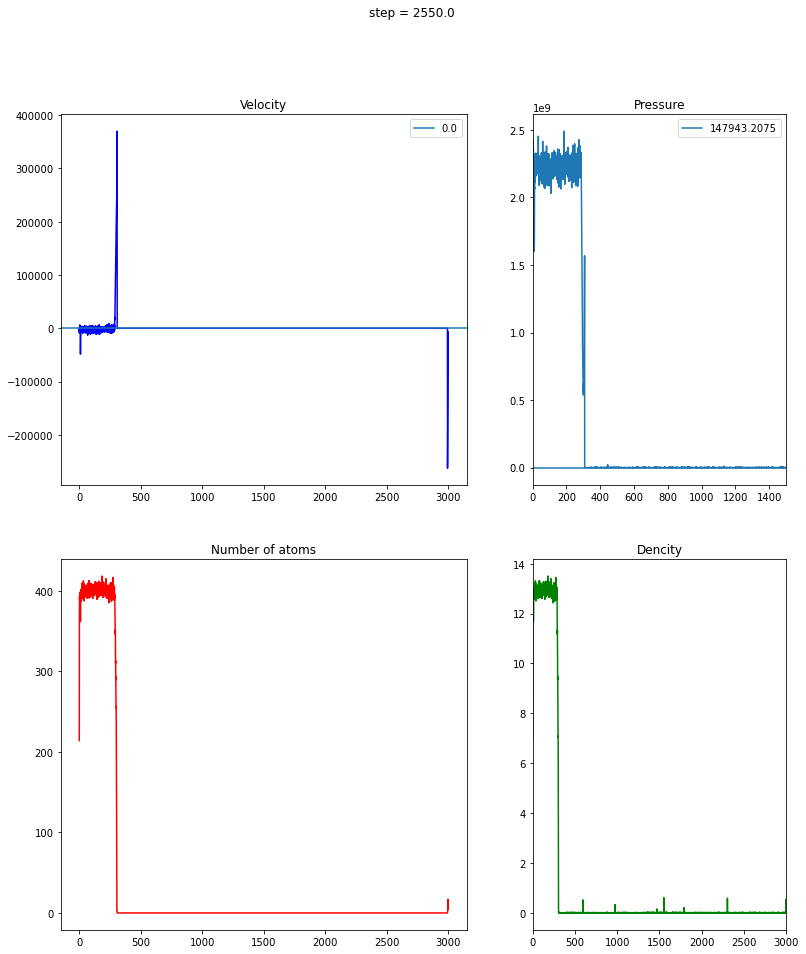

150
0.0
251098.7575


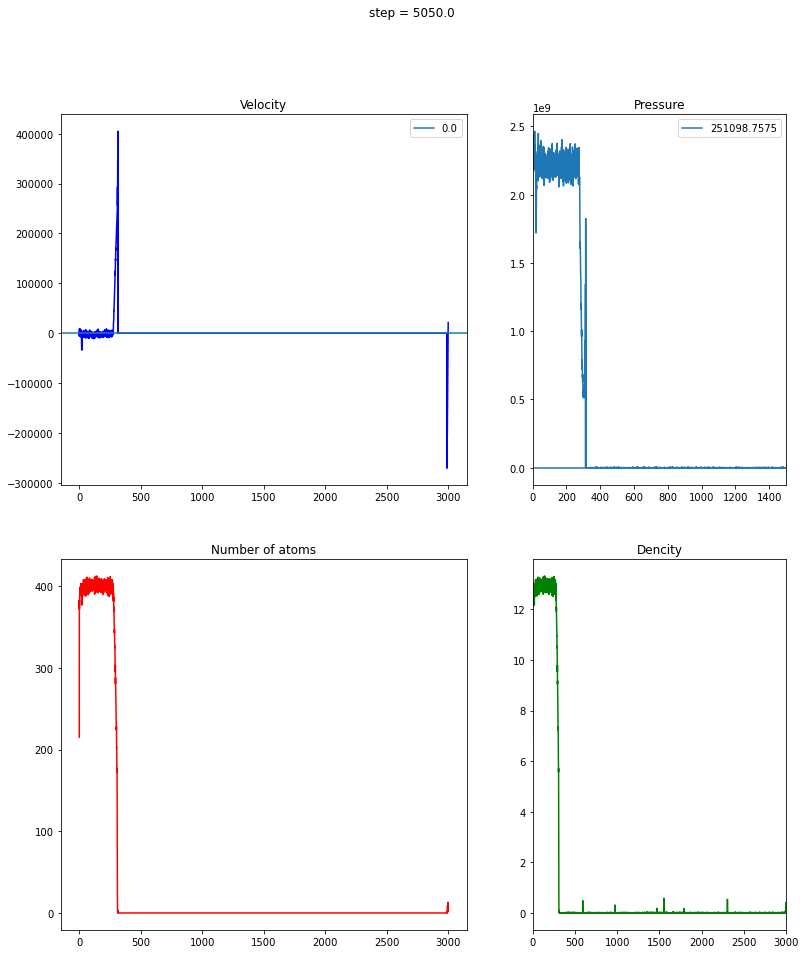

200
0.0
237900.9625


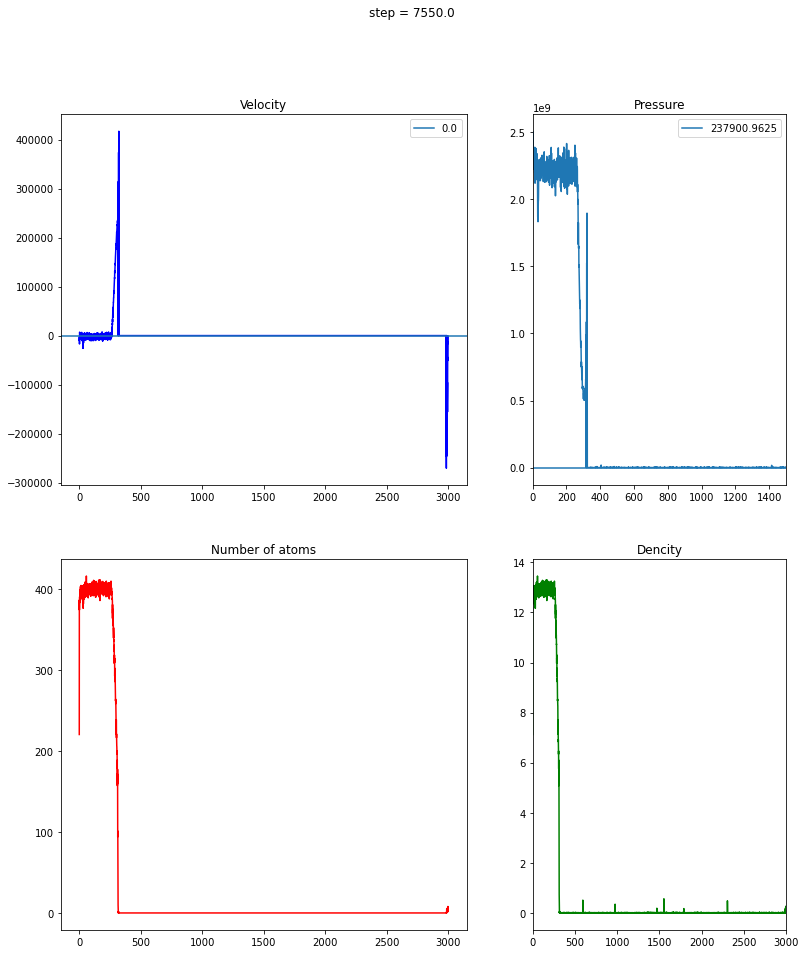

250
0.0
236381.035


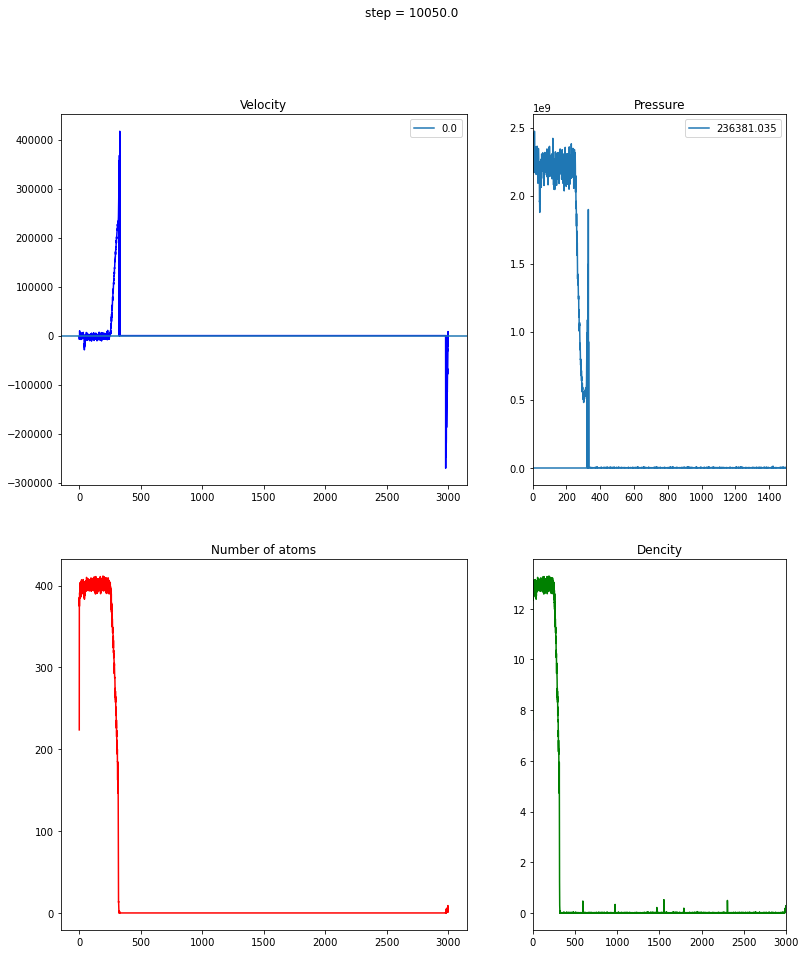

300
0.0
293434.0825


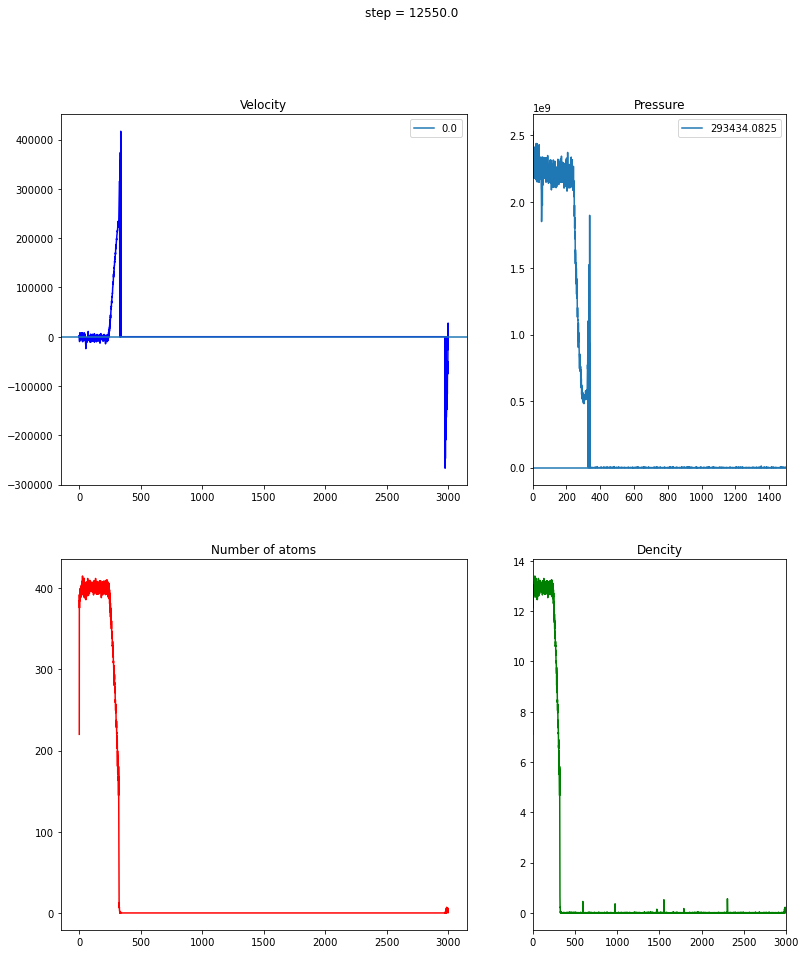

350
20073.3
264622.96


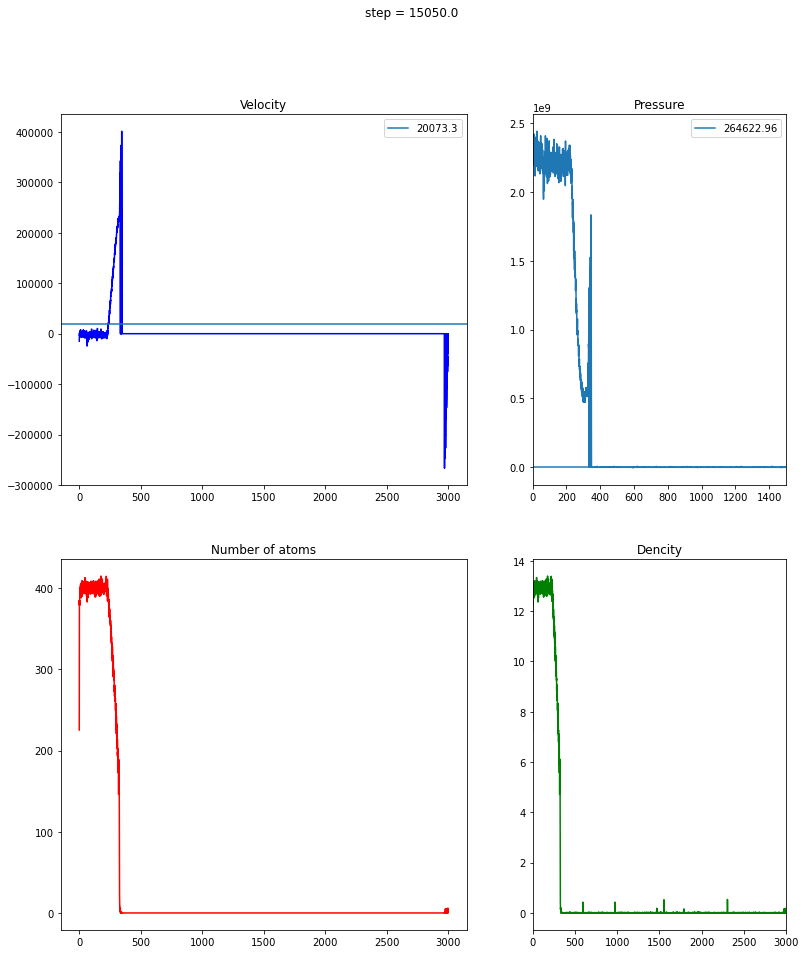

400
67431.9
223255.945


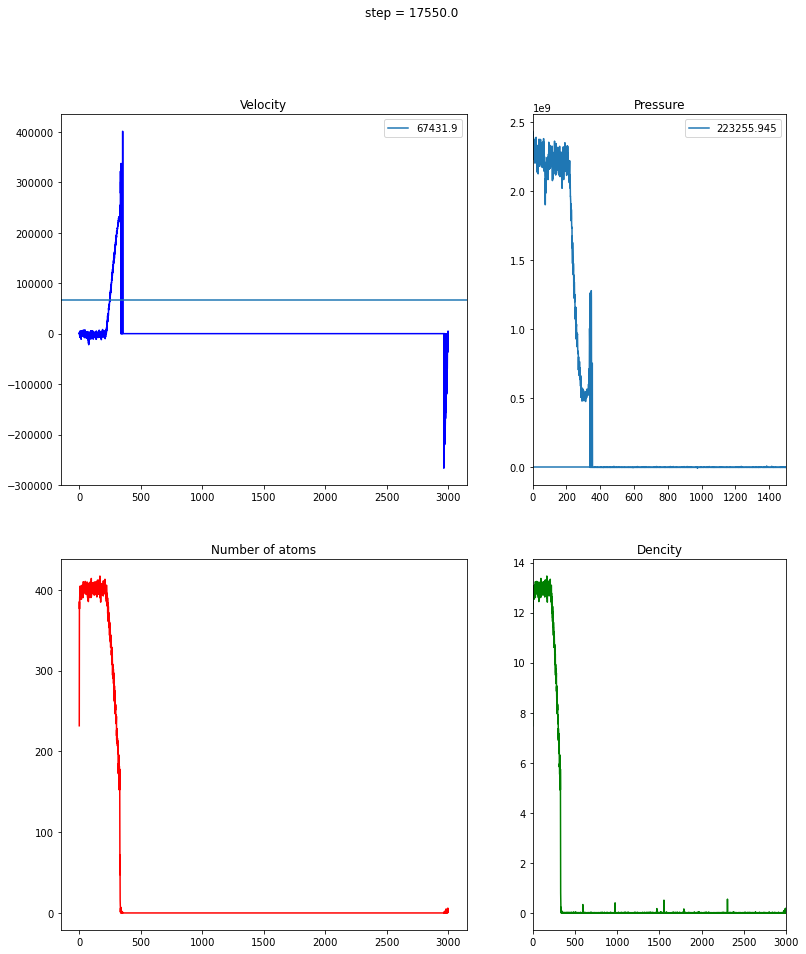

450
203432.05
284790.28500000003


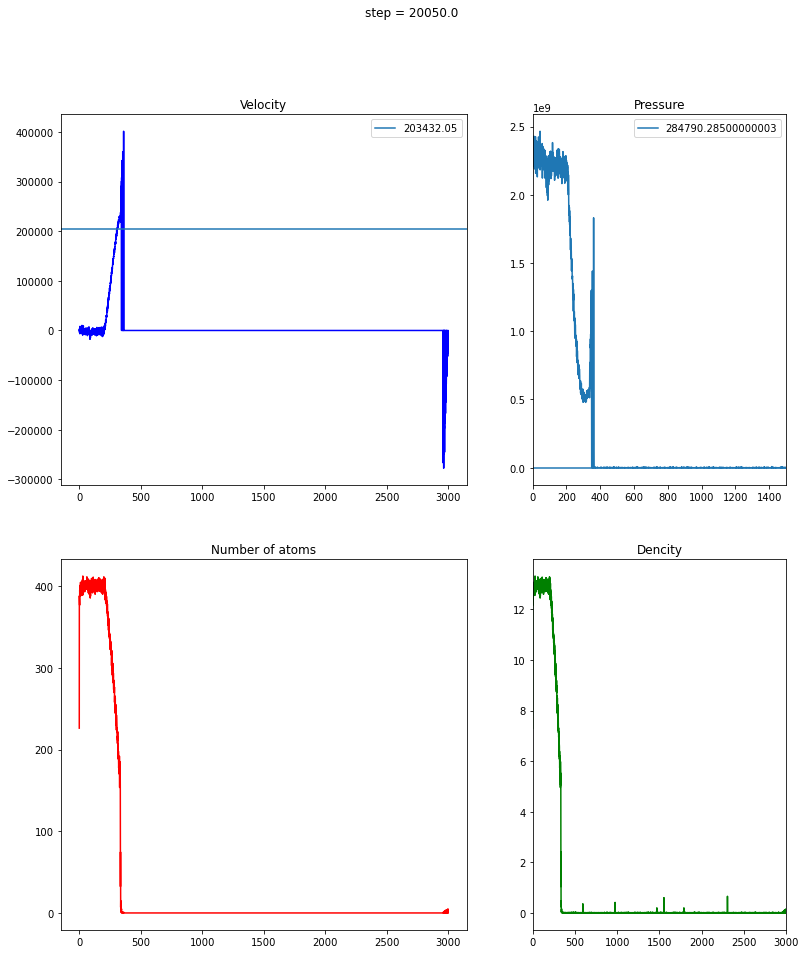

500
257424.6
235981.0525


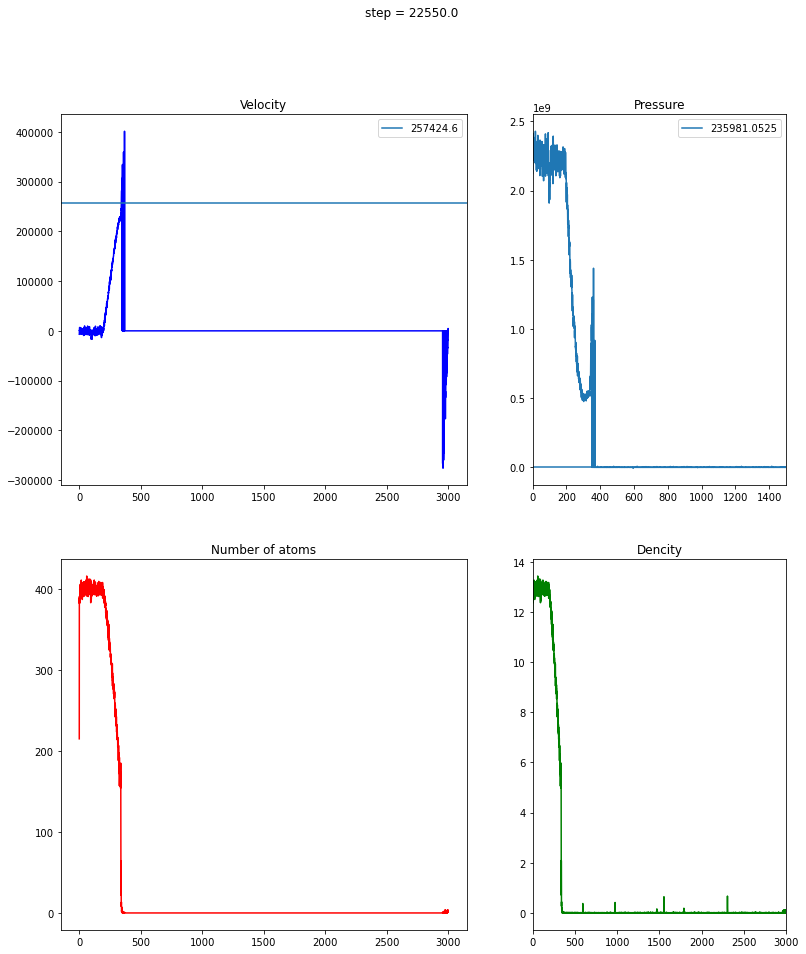

550
242131.85
243872.275


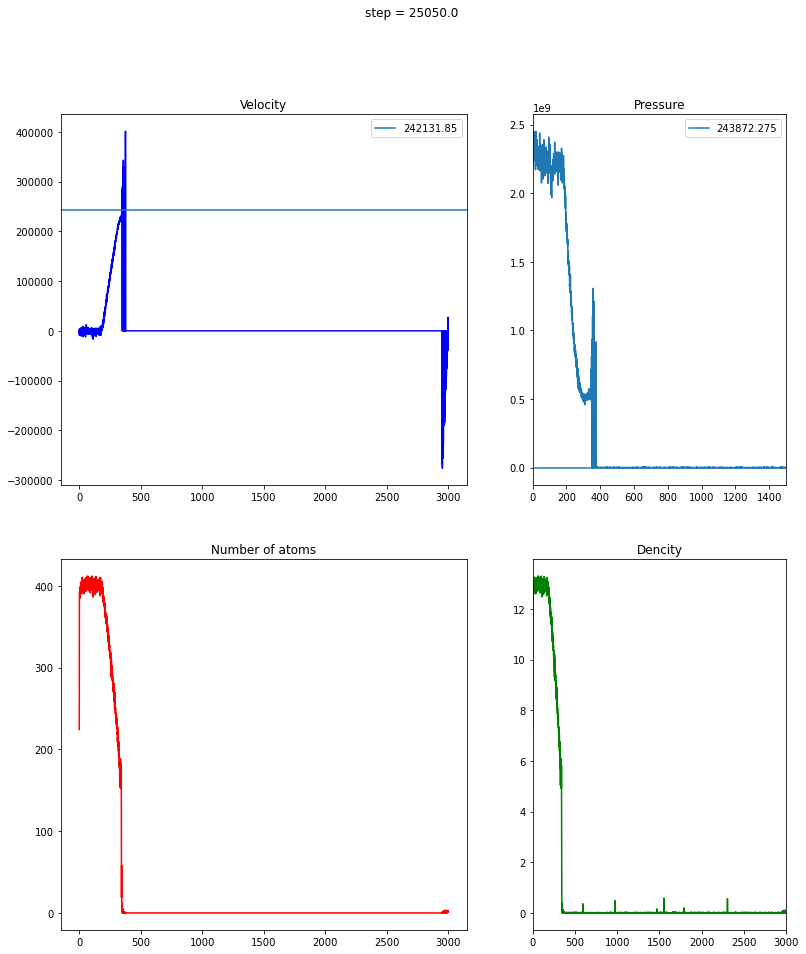

600
235399.65
327264.39


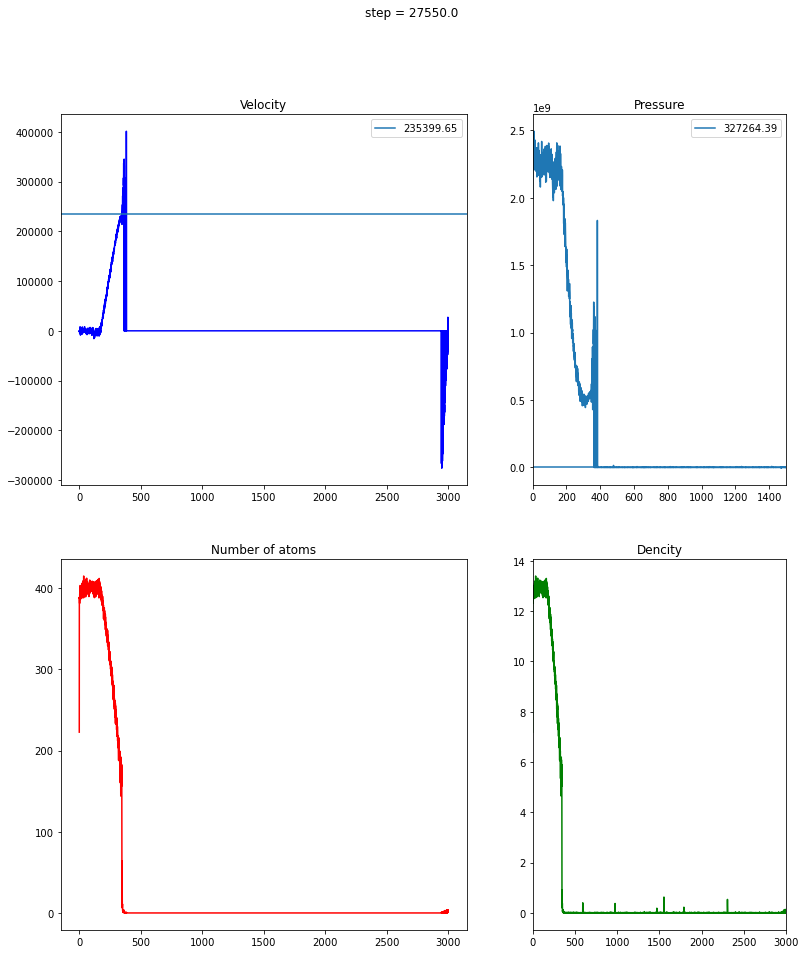

650
225127.8
249919.9025


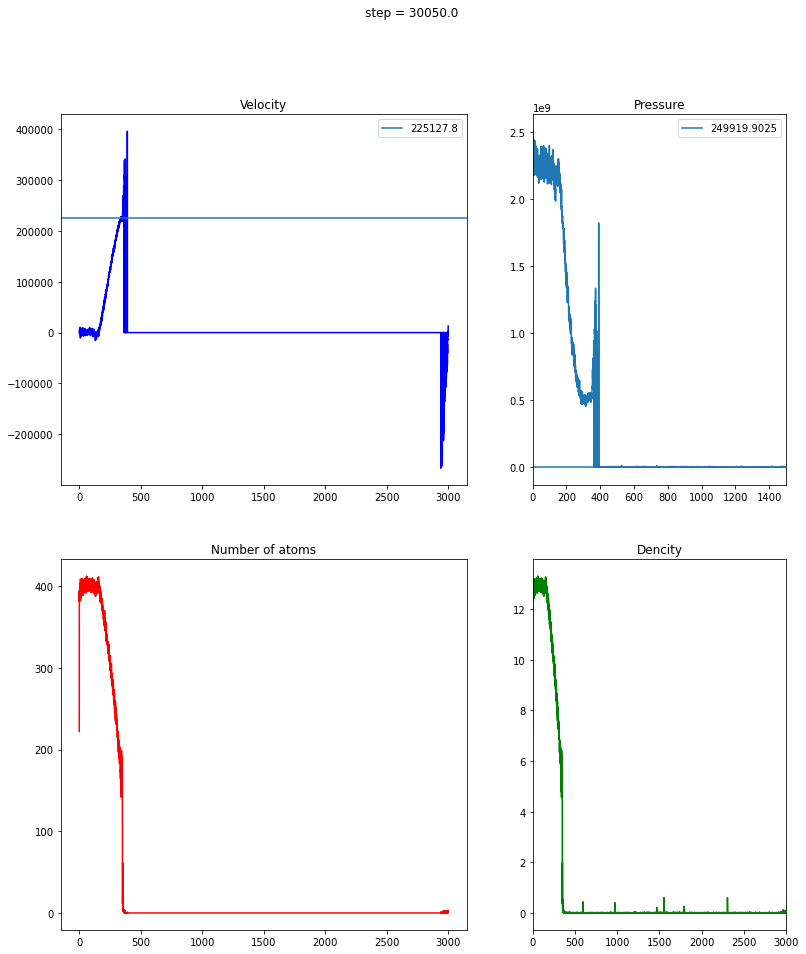

700
223061.15
288330.52


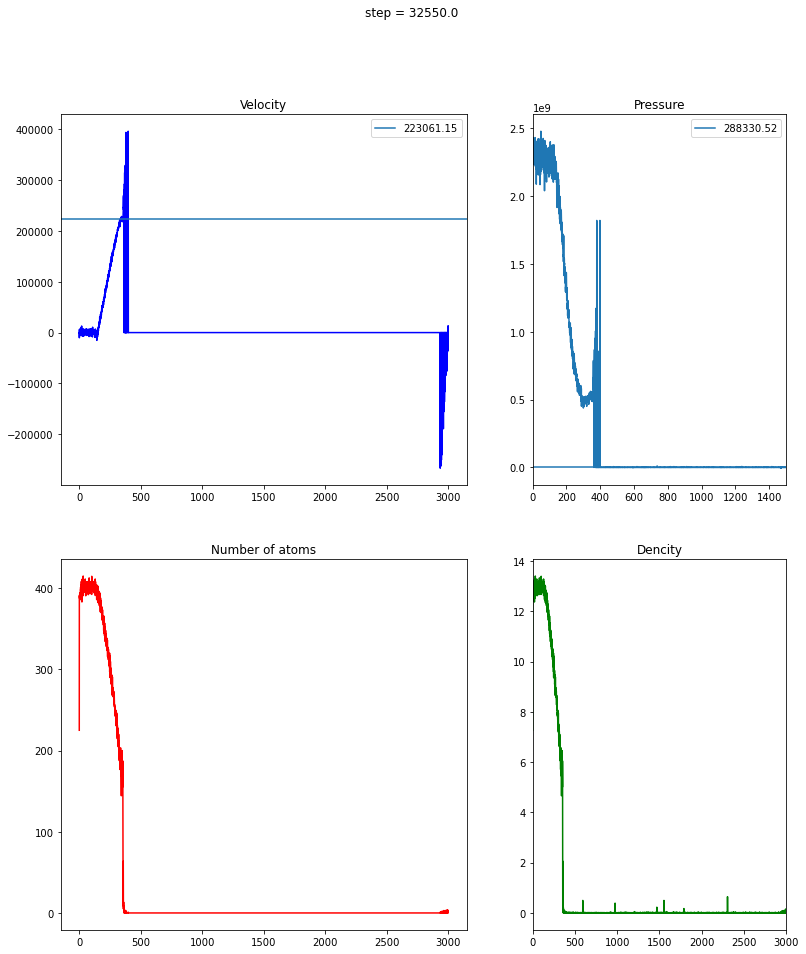

750
222416.05
207334.625


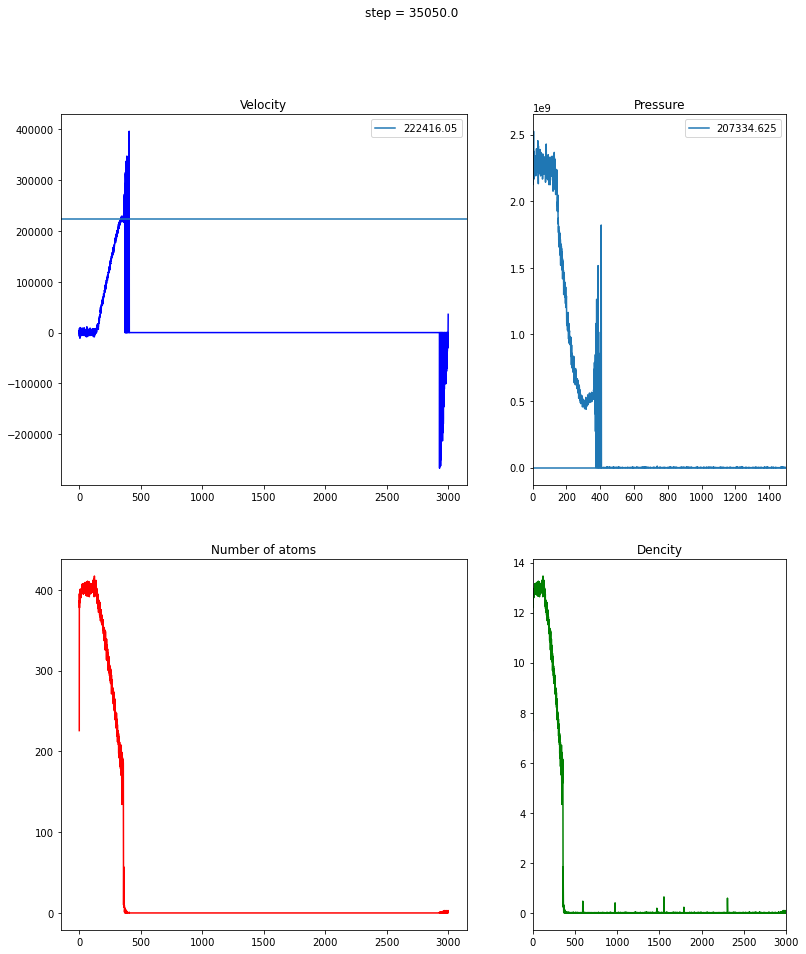

800
222322.6
45717853.95


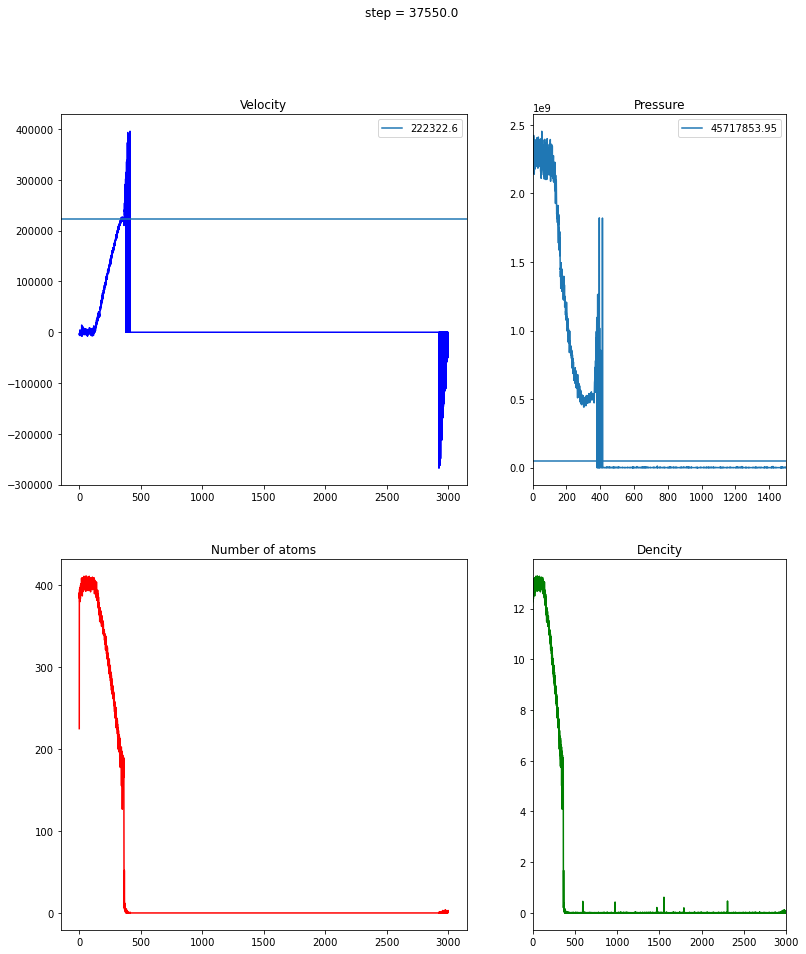

850
222155.45
86301787.975


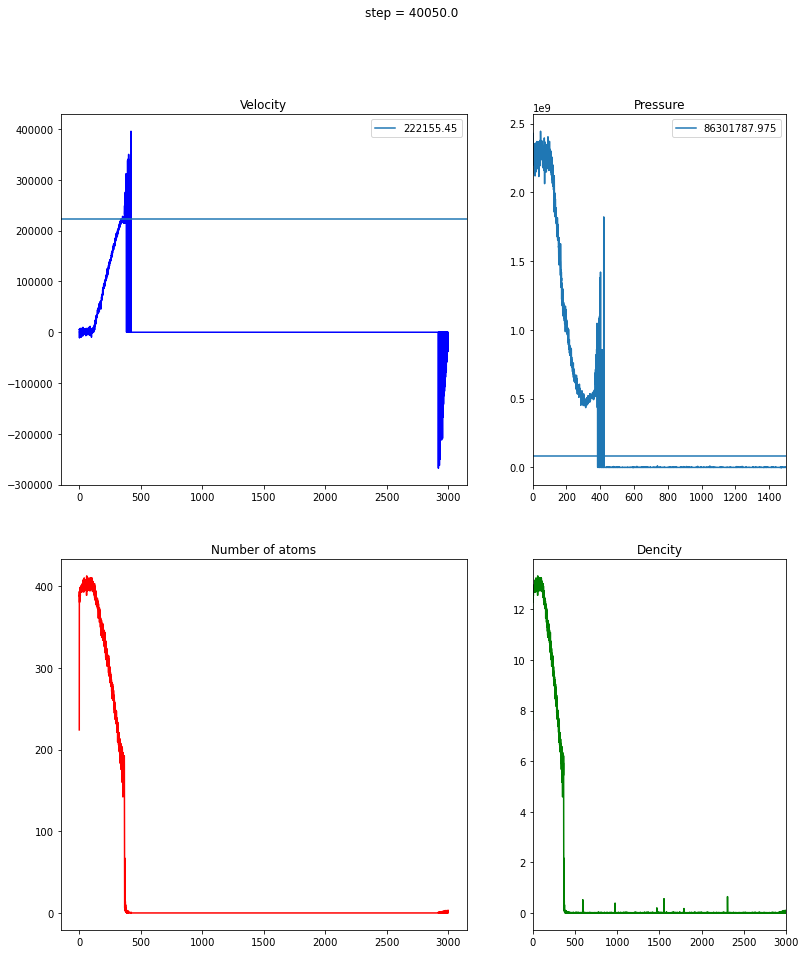

900
220319.45
114661830.725


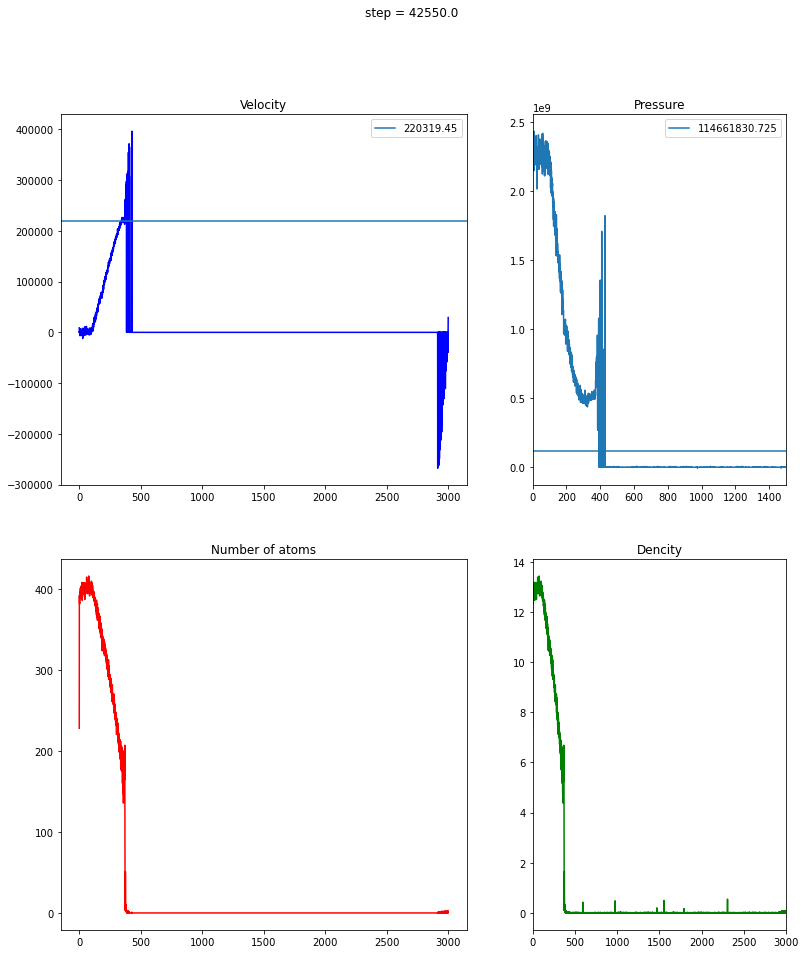

950
218970.25
200265991.675


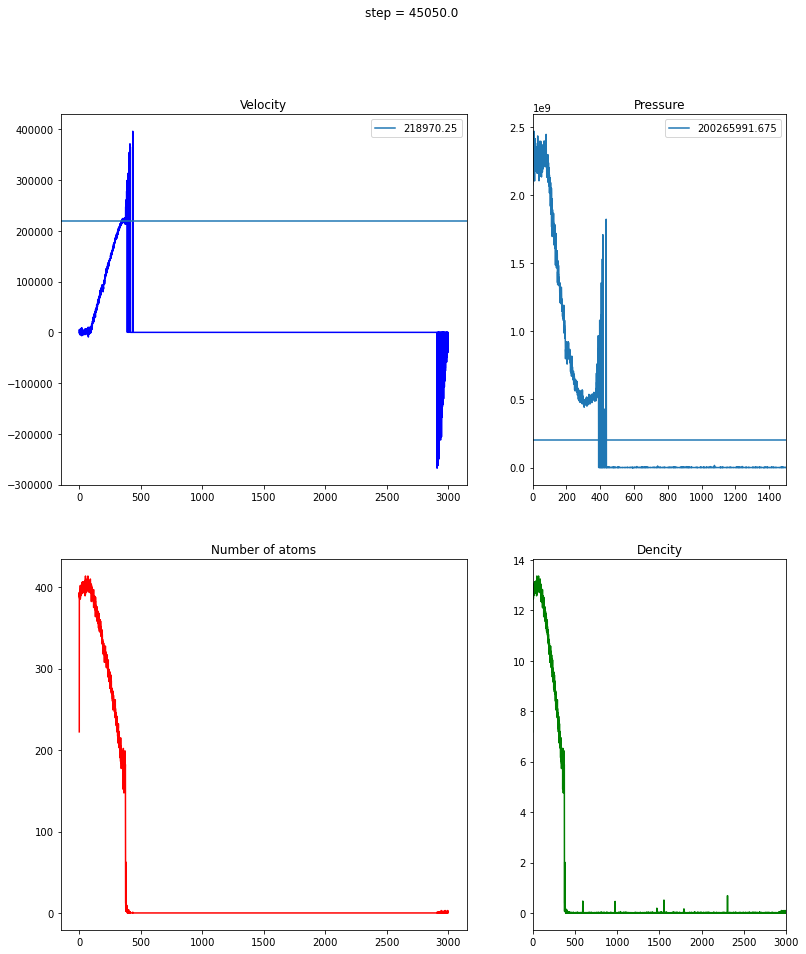

1000
218127.25
348741379.25


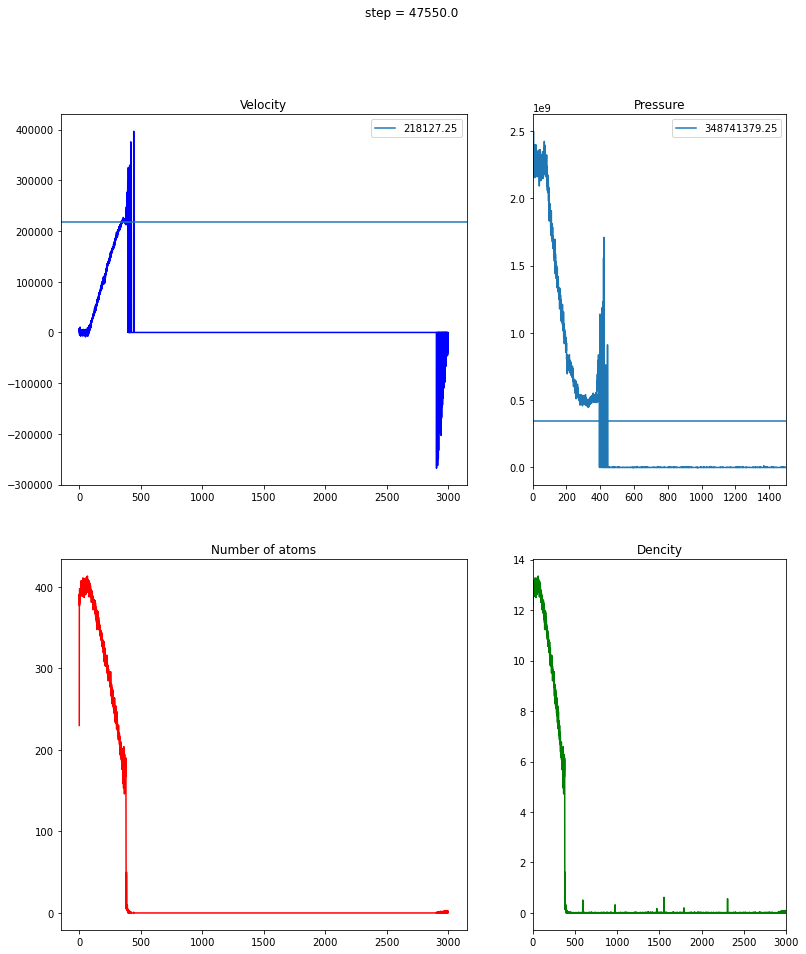

1050
216349.45
416747334.225


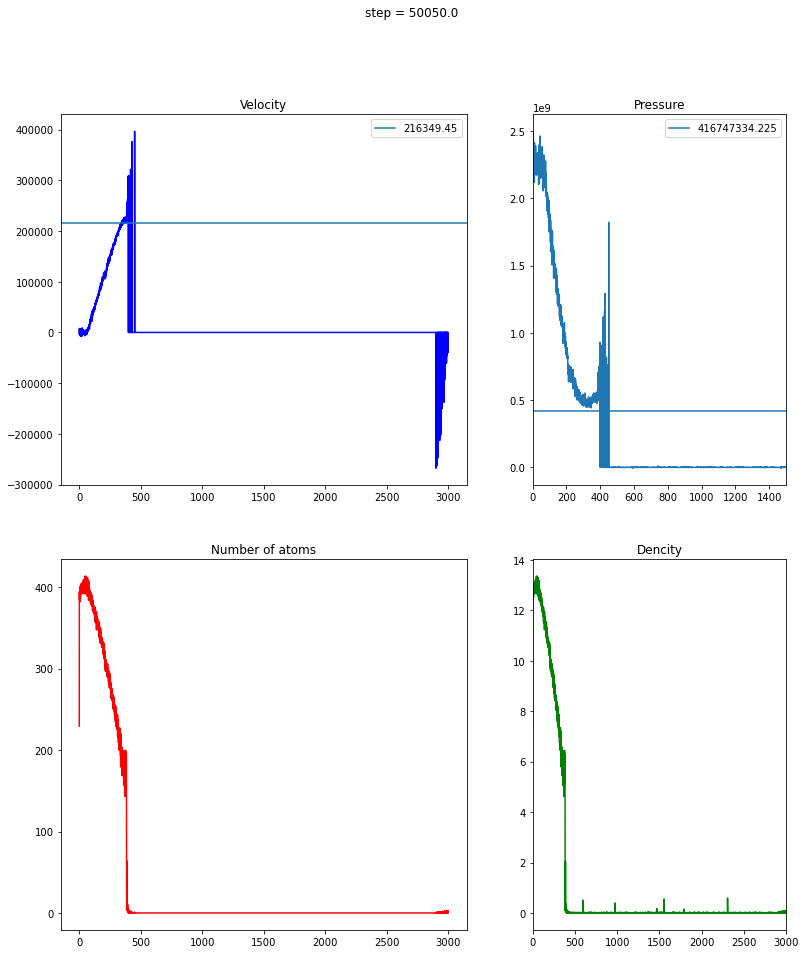

1100
214710.55
475356466.8


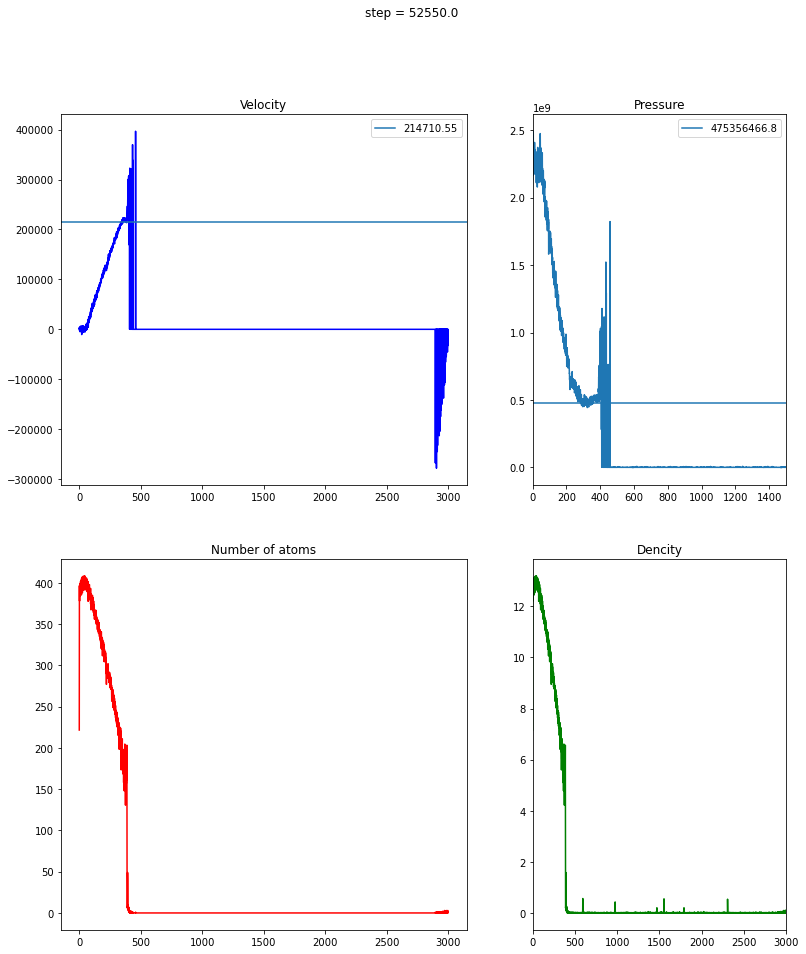

1150
214107.4
542818800.0


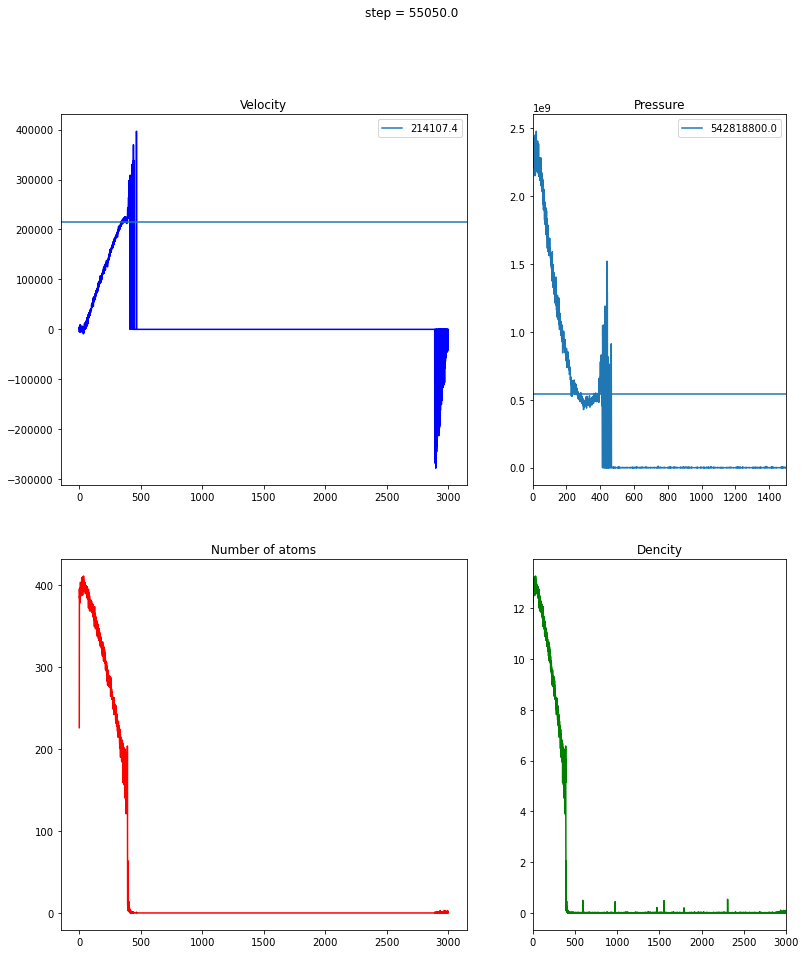

1200
213406.5
513405250.0


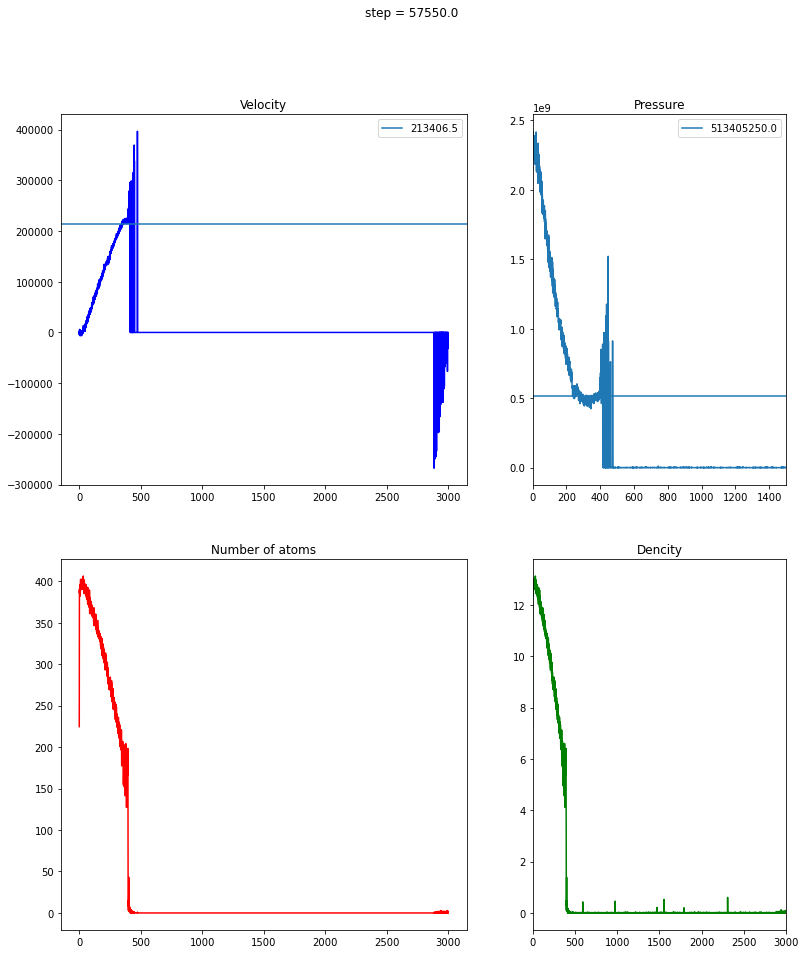

1250
211814.65
637860950.0


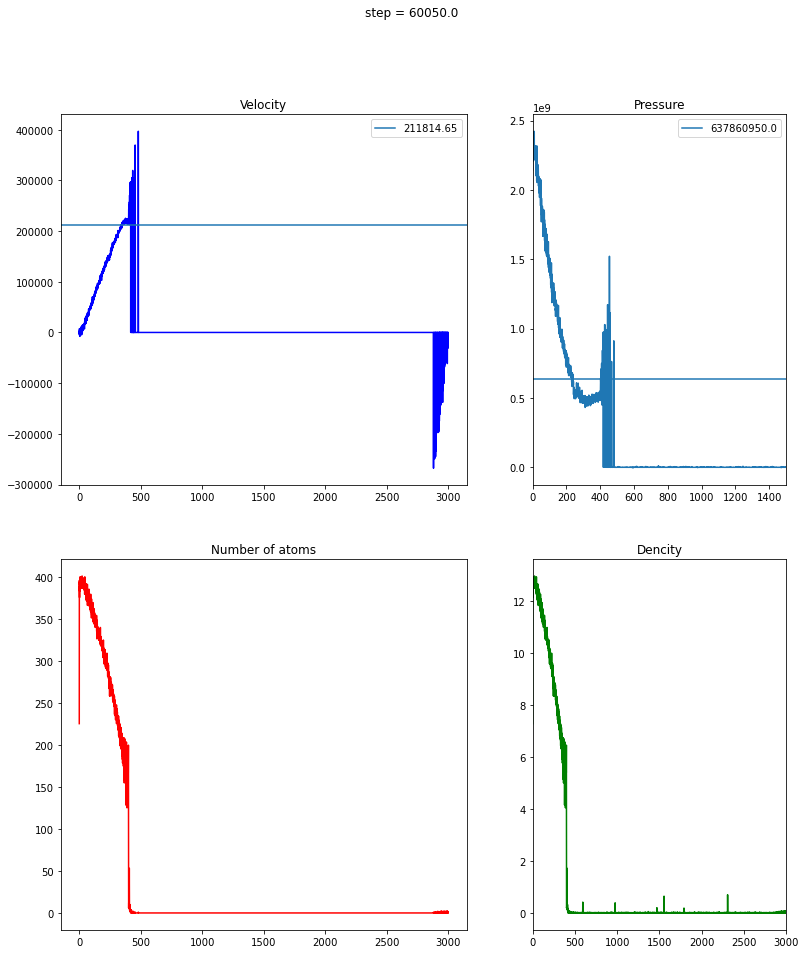

1300
210972.15
623332825.0


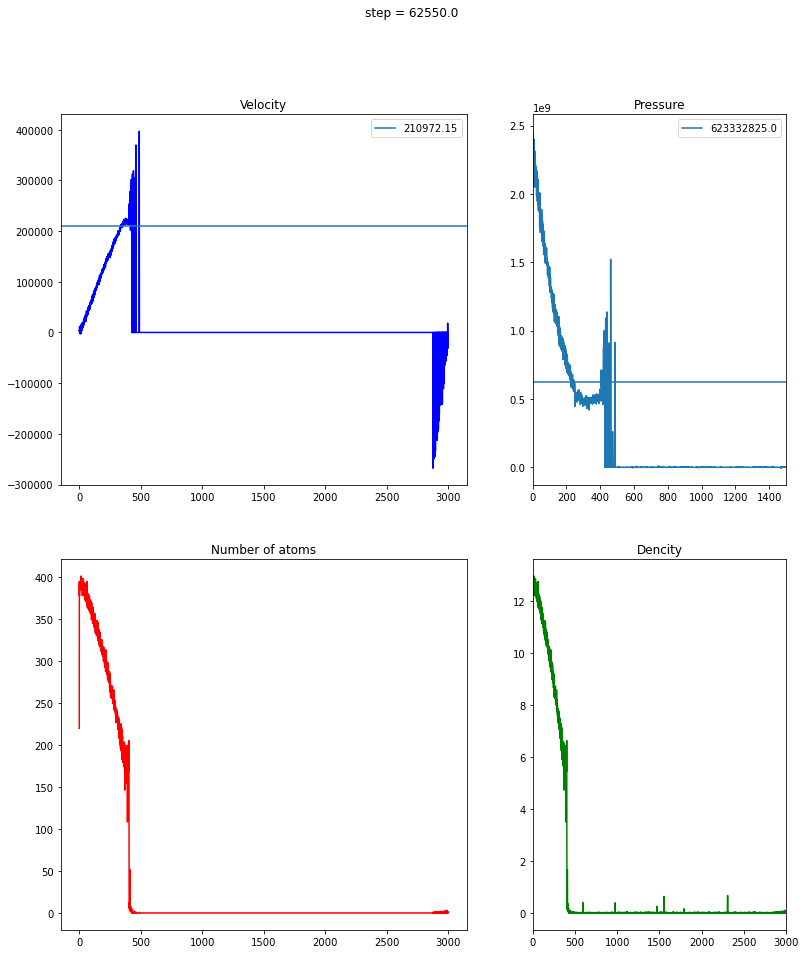

1350
211182.2
670855650.0


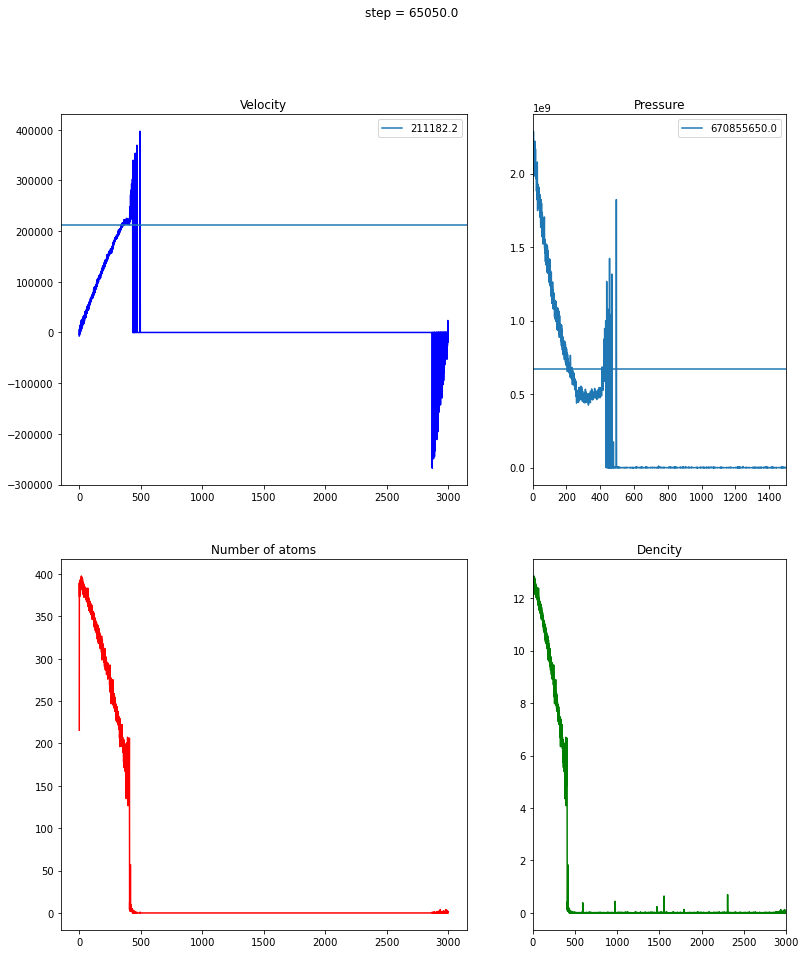

1400
209450.1
614937100.0


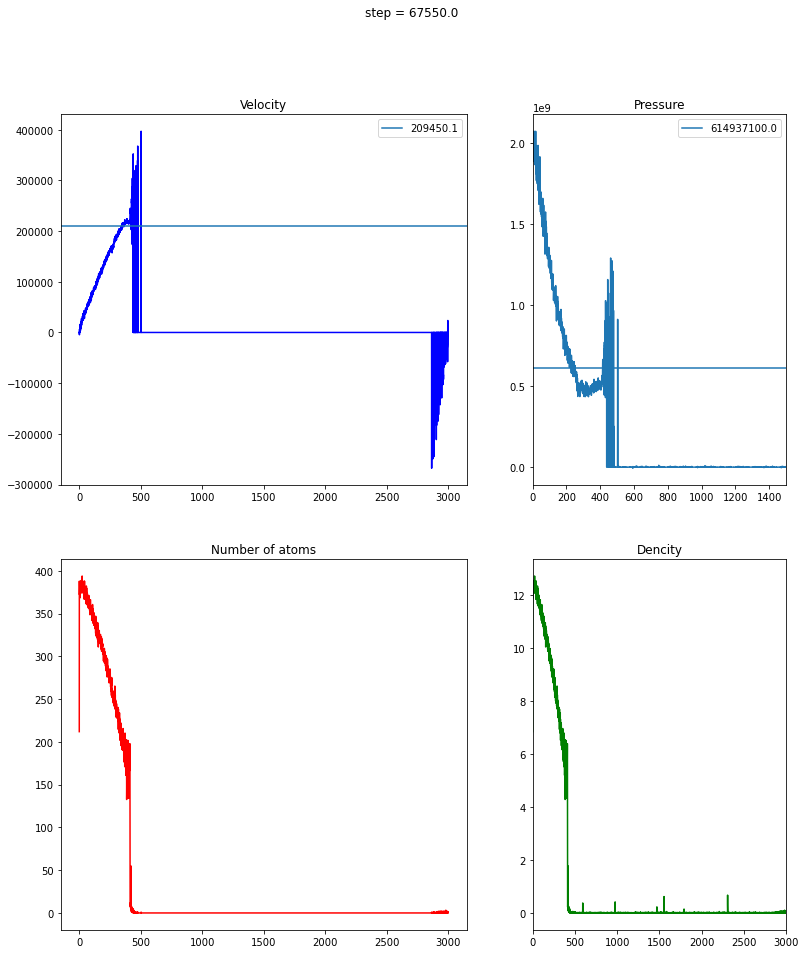

1450
207835.55
577748525.0


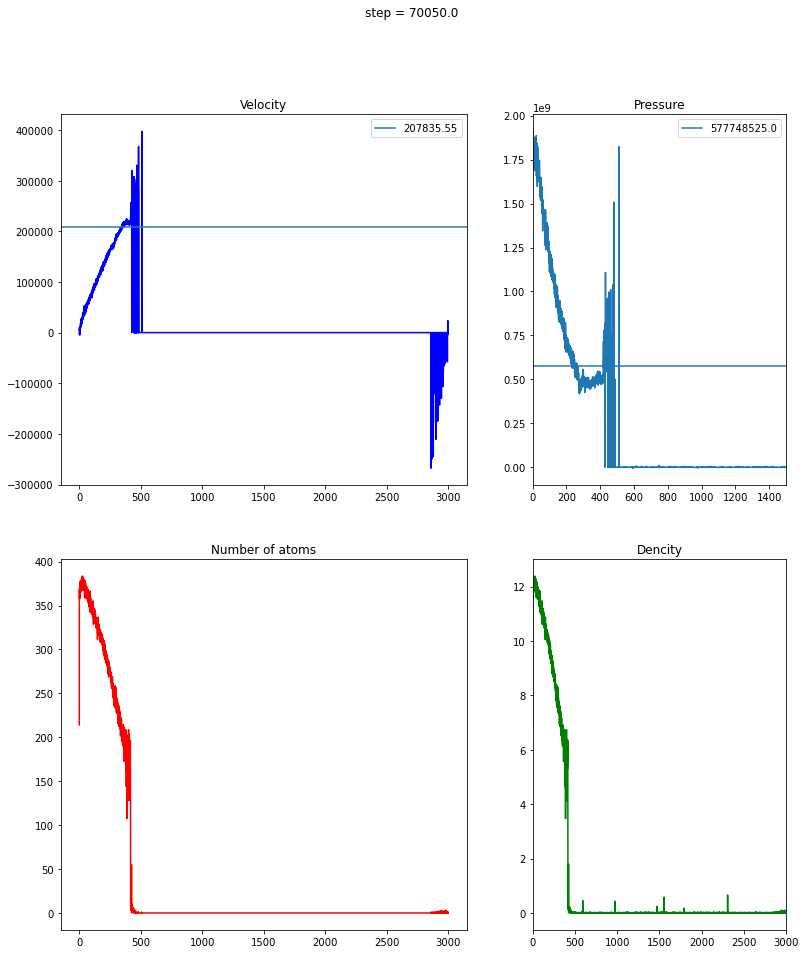

1500
207112.0
553516800.0


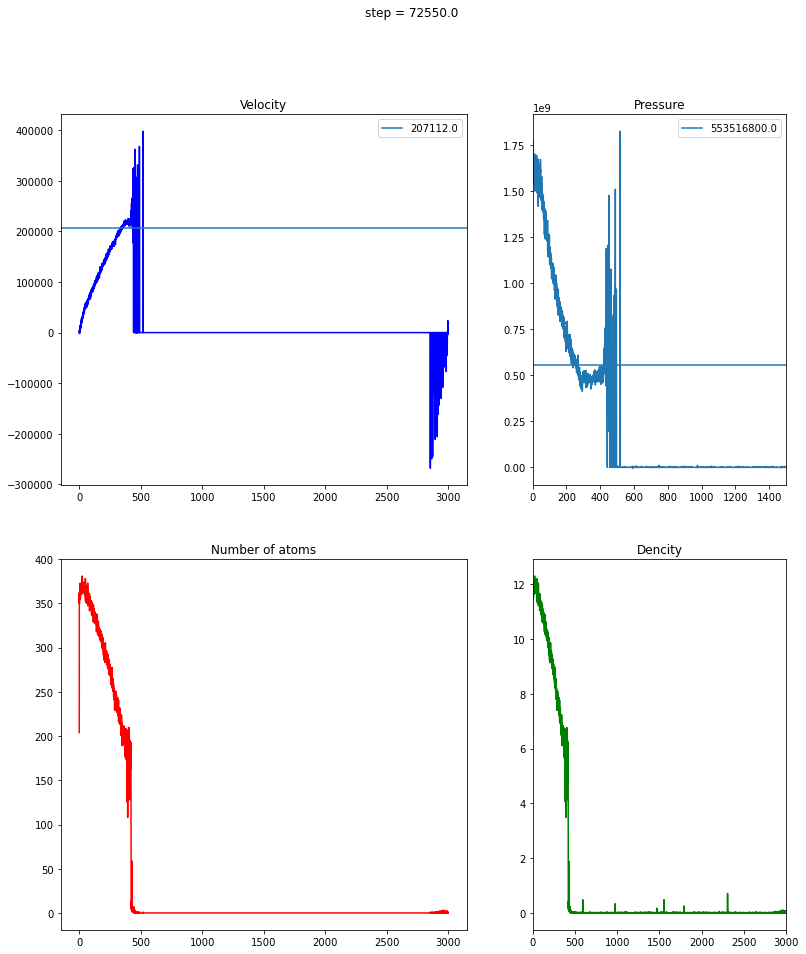

1550
207535.75
534705100.0


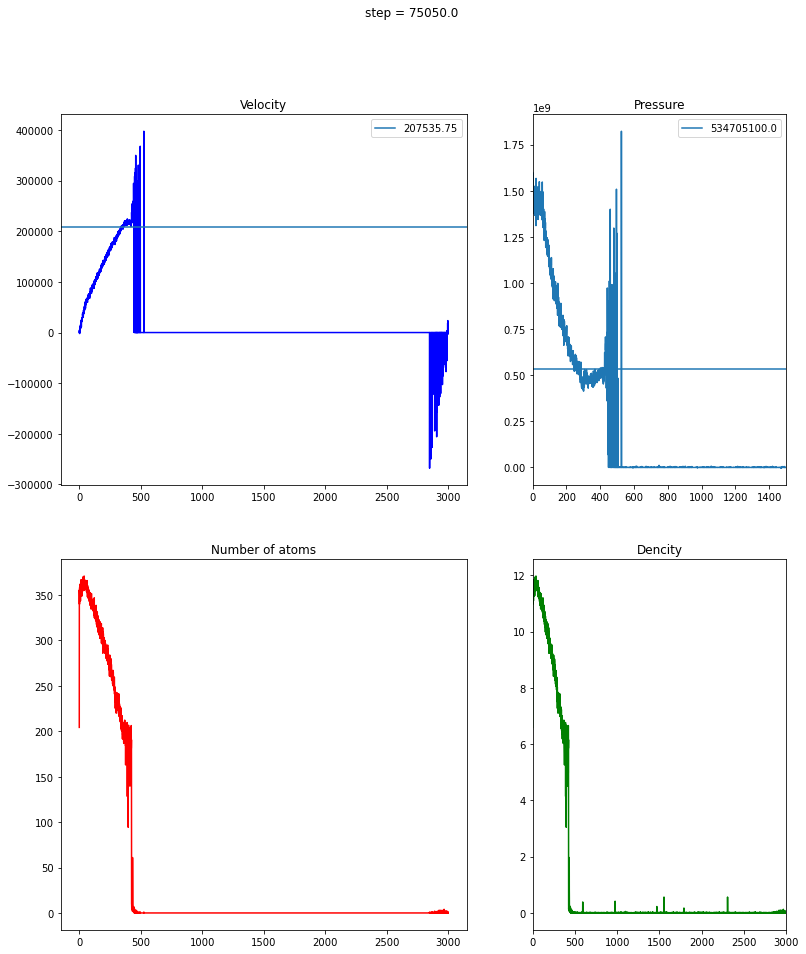

1600
206720.7
514293575.0


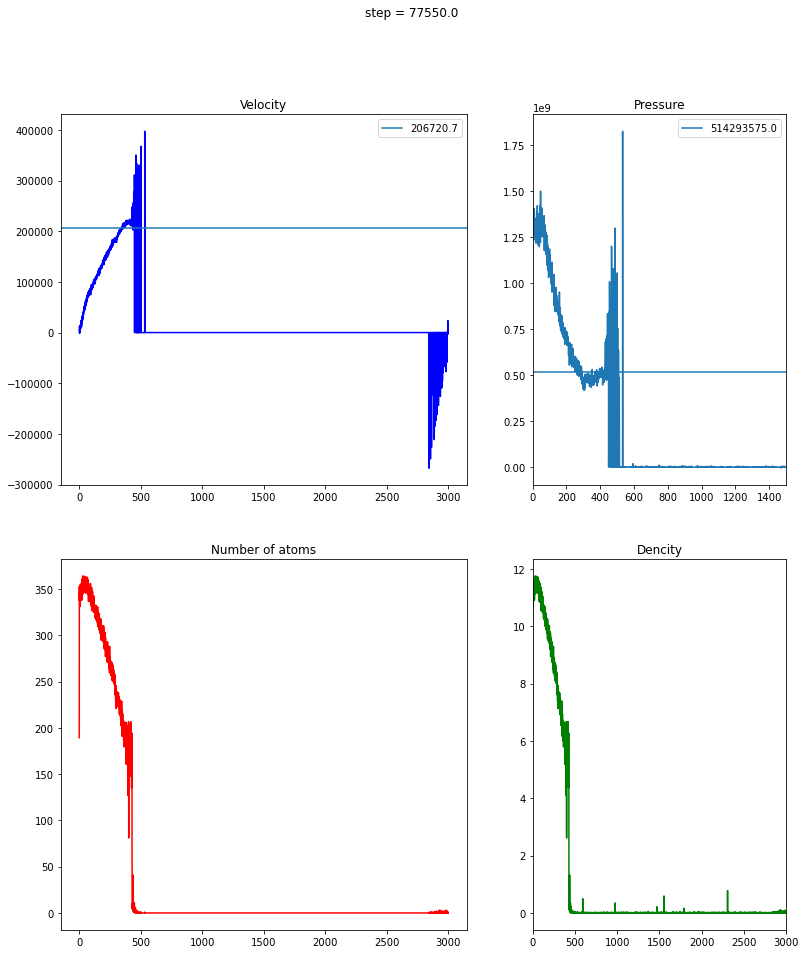

1650
205759.3
507405850.0


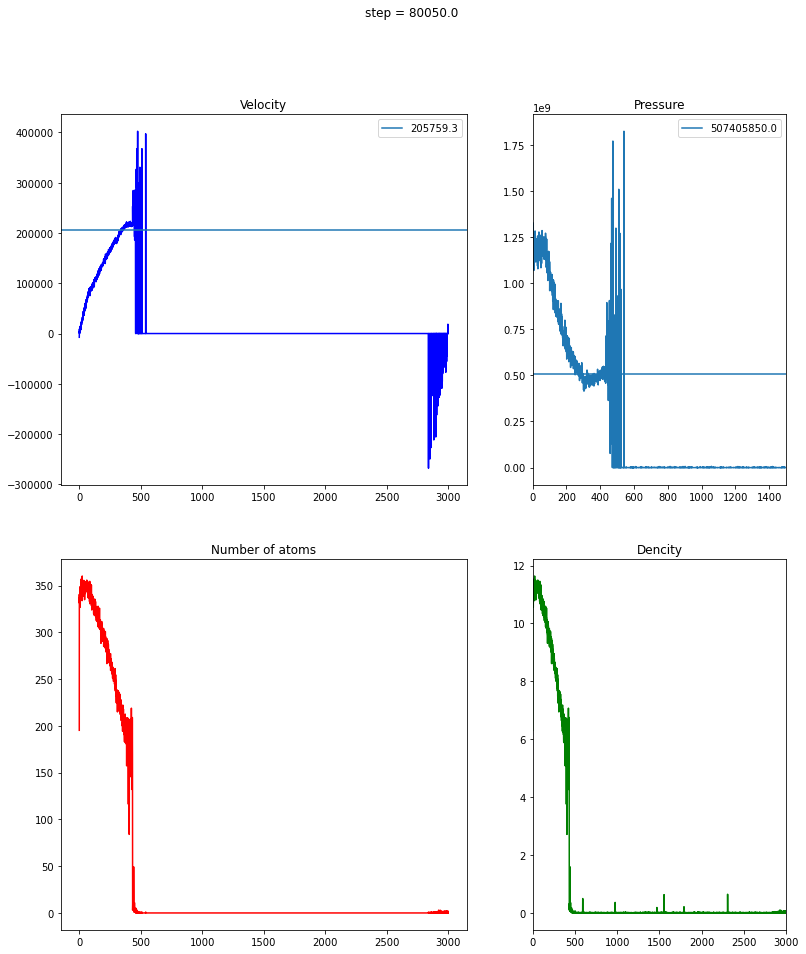

1700
205191.95
505442350.0


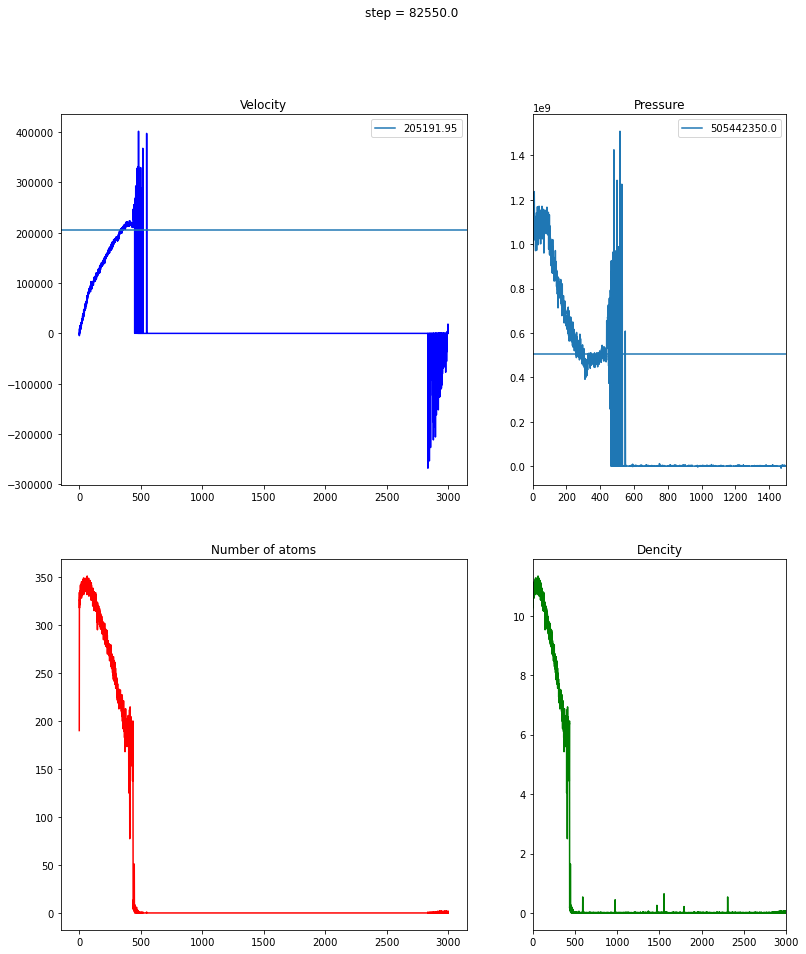

1750
205580.45
502027675.0


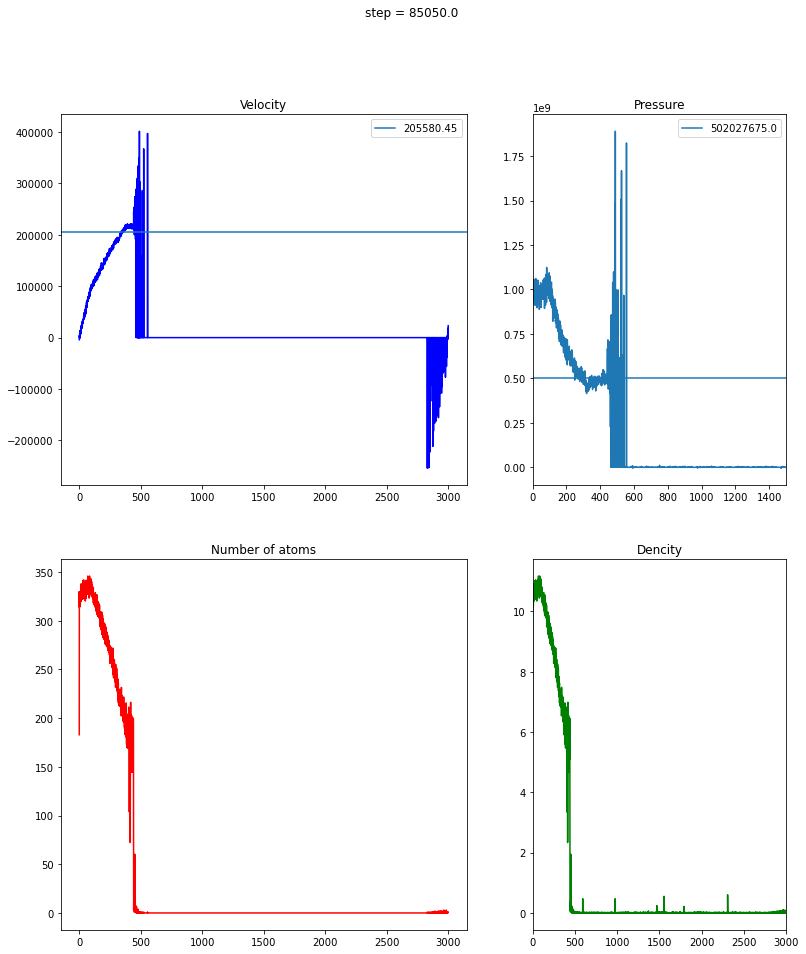

1800
205365.15
503551250.0


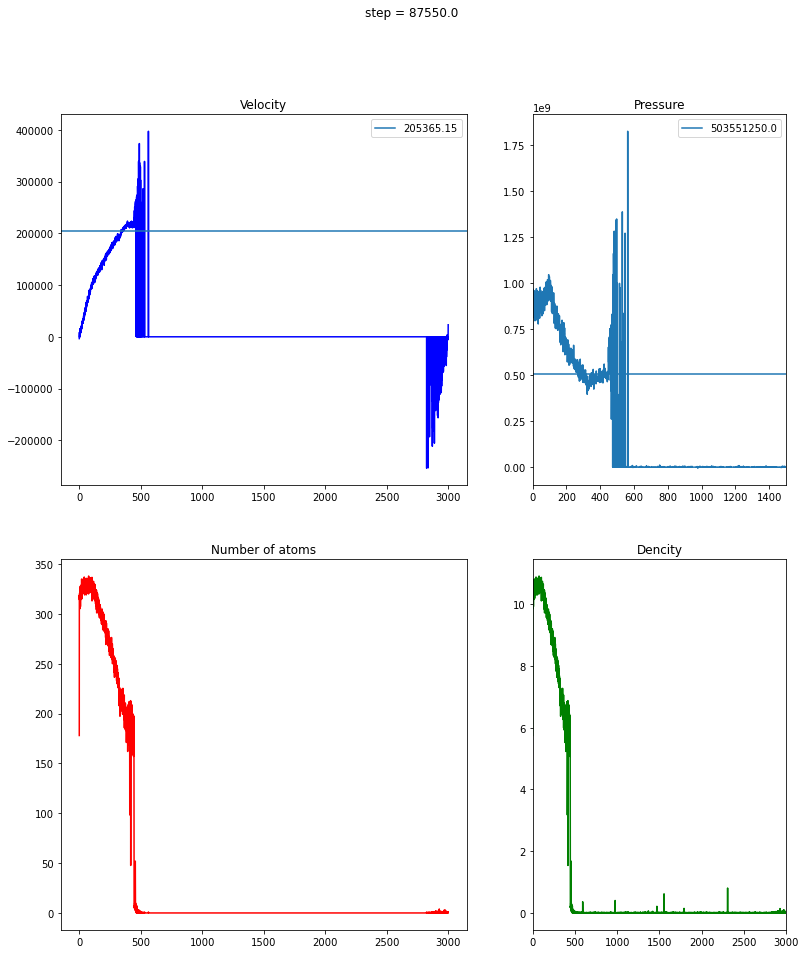

1850
204316.1
498279925.0


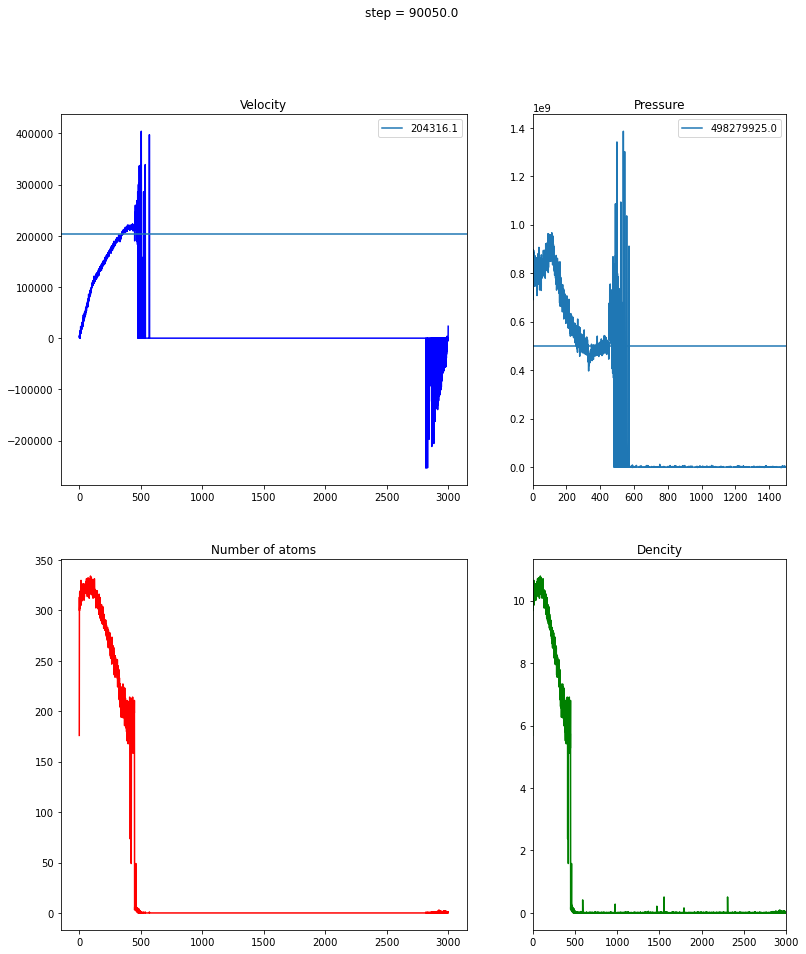

1900
202058.15
499581450.0


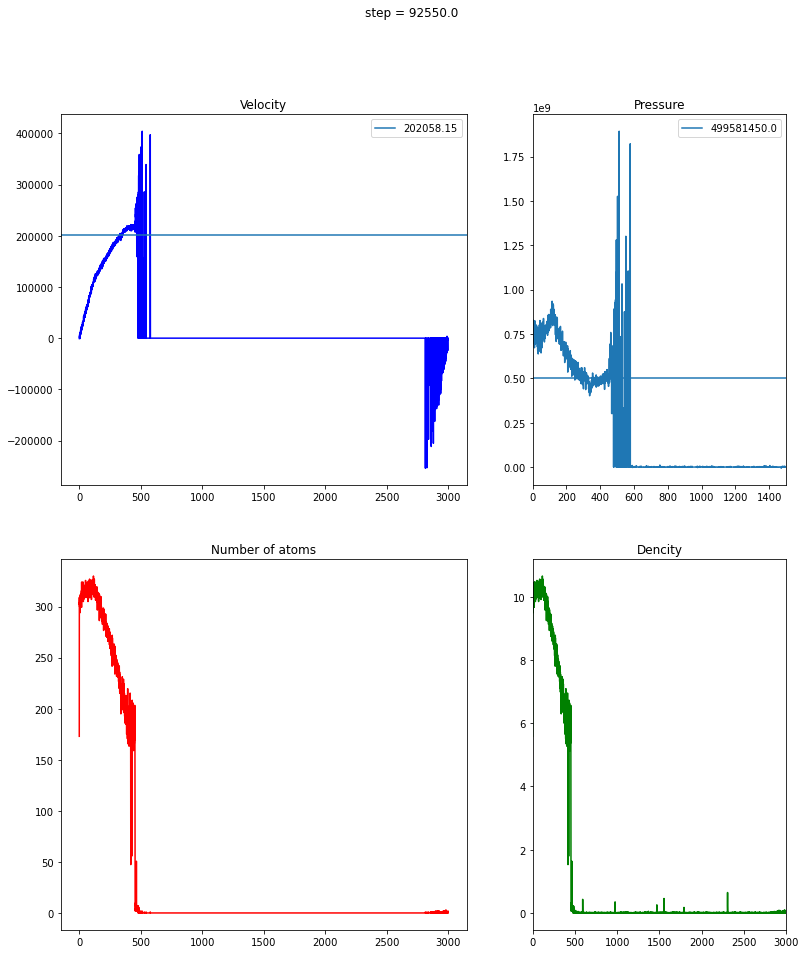

1950
199531.9
493702425.0


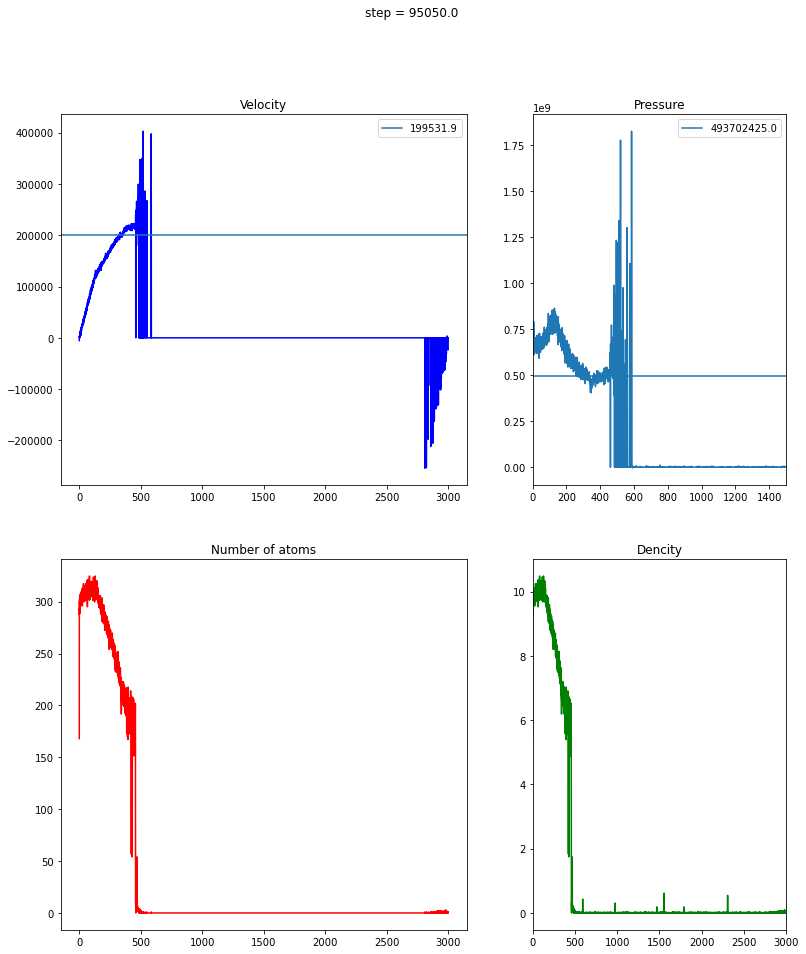

2000
201034.55
494730625.0


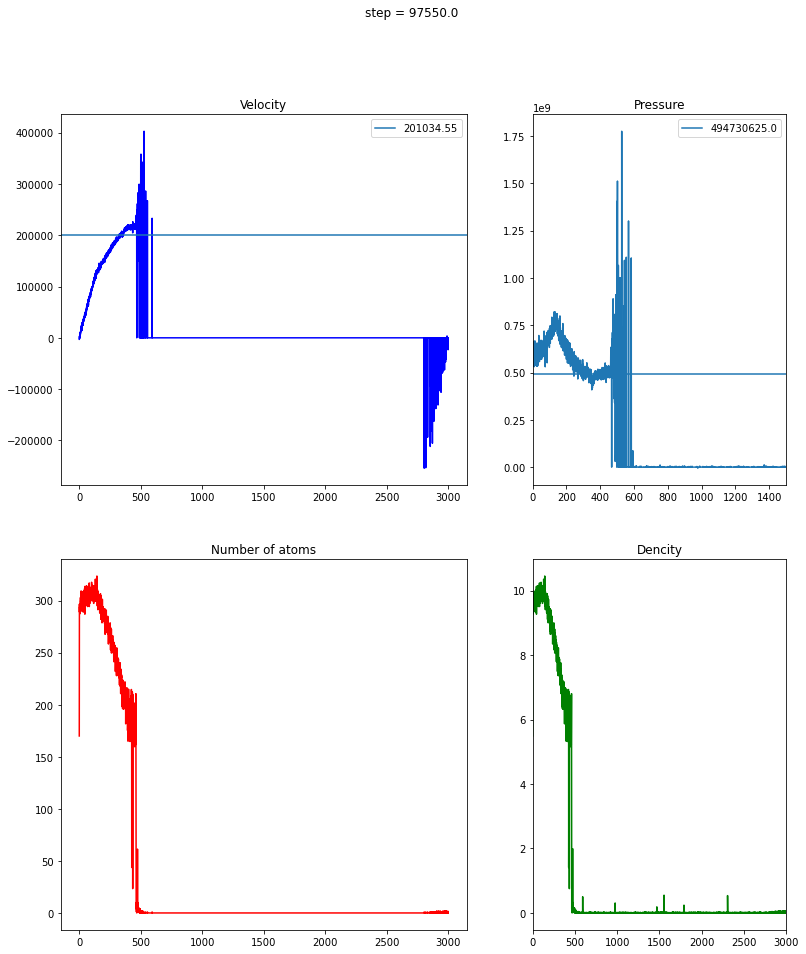

"\n    plt.plot(X, T, 'r')\n    plt.legend([data[0][float(begins[i])]])\n    plt.show()\n    plt.plot(X, D, 'g')\n    plt.legend([data[0][float(begins[i])]])\n    plt.show()\n    plt.legend([data[0][float(begins[i])]])\n    "

In [7]:
from matplotlib.backends.backend_pdf import PdfPages

step = 50
scale = 3000
for i in range(0, len(begins)-1):
    if (step % 50 == 0 and step < 2001):
        X = []
        P = []
        T = []
        D = []
        N = []
        D_s = []
        D_b = []
        Y = []
        tmp = float(begins[i]) + 1
        while tmp < begins[i+1]:
            X.append(scale*float(data[1][tmp]))
            Y.append(float(data[3][tmp]))
            N.append(float(data[2][tmp]))
            #T.append(float(data[6][tmp]))
            D.append(float(data3[1][tmp]))
            P.append(float(data3[0][tmp]))
            #D_s.append(float(data1[0][tmp]))
            #D_b.append(float(data2[0][tmp]))

            tmp += 1
        #print(X)
        #print(Y)
        fig, axs = plt.subplots(2, 2, figsize=(13, 15), gridspec_kw={'width_ratios': [8, 5]})
        fig.suptitle(f'step = {data[0][float(begins[i])]}')
        axs[0, 0].set_title('Velocity')
        axs[0, 0].plot(X, Y, 'b')
        M = np.nanmean(Y[570 : 590])
        print(step)
        print(M)
        axs[0, 0].axhline(y=np.nanmean(Y[570 : 590]), label= M)
        axs[0, 0].legend()
        
        axs[1, 0].set_title('Number of atoms')
        axs[1, 0].plot(X, N, 'r')
        #plt.xlim([1450, 2500])
        #plt.ylim([-0.05, 0.07])
        #plt.plot(X, D_s)
        #plt.plot(X, D_b)
        #plt.plot(X, D, 'r')
        #plt.legend([data[0][float(begins[i])]])
        #plt.show()
        axs[0, 1].plot(X, P)
        axs[0, 1].set_title('Pressure')
        axs[0, 1].set_xlim([0, 1500.0])
        M = np.nanmean(P[680 : 720])
        print(M)
        axs[0, 1].axhline(y=np.nanmean(P[680 : 720]), label= M)
        axs[0, 1].legend()
        
        axs[1, 1].plot(X, D, 'g')
        axs[1, 1].set_title('Dencity')
        axs[1, 1].set_xlim([0, 3000.0])
        #axs[1, 1].set_ylim([0, 3])
        #plt.savefig(f'./pictures/{i}.pdf',dpi = 300)
        plt.show()
        if step == 750:
            coord = X
            velos = Y
            dens  = D
        if step == 850:
            coord1 = X
            velos1 = Y
    step += 1
'''   
        plt.plot(X, Y, 'b')
        plt.title(f'step = {data[0][float(begins[i])]}')
        M = np.nanmean(Y[680 : 720])
        print(M)
        plt.axhline(y=np.nanmean(Y[680 : 720]), label= M)
        plt.savefig(f'./pictures/W_{i}.pdf',dpi = 300)
        plt.legend()
        plt.show()
        #plt.xlim([1450, 2500])
        #plt.ylim([-0.05, 0.07])
        #plt.plot(X, D_s)
        #plt.plot(X, D_b)
        #plt.plot(X, D, 'r')
        #plt.legend([data[0][float(begins[i])]])
        #plt.show()
        plt.plot(X, P)
        plt.title(f'step = {data[0][float(begins[i])]}')
        M = np.nanmean(P[680 : 720])
        print(M)
        plt.axhline(y=np.nanmean(P[680 : 720]), label= M)
        plt.savefig(f'./pictures/P_{i}.pdf',dpi = 300)
        plt.legend()
        plt.show()
    
    
    if step % 20 == 0:
        figure, axis = plt.subplots(1, 2, layout="constrained")
        figure.set_figheight(15)
        figure.set_figwidth(15)
    
        axis[0].set_ylim(-0.01, 0.05)
        axis[0].plot(X, D_s)
        axis[0].plot(X, D_b)
        axis[0].plot(X, D, 'r')
        axis[0].set_title([data[0][float(begins[i])]])
  
        # For Cosine Function
        axis[1].plot(X, P)
        axis[1].set_title([data[0][float(begins[i])]])
        figure.suptitle([data[0][float(begins[i])]])
        
        plt.savefig(f'./pictures/{i}.pdf',dpi = 300)
    step += 1
''' 
'''
    # For Tangent Function
    axis[1, 0].plot(X, D, 'g')
    axis[1, 0].set_title("Density")
    
    figure.suptitle([data[0][float(begins[i])]])
    #plt.savefig(f'./pictures/{i}.png',dpi = 300)
    for t in [1900, 3150]:
        if float(data[0][begins[i]]) == t:
            plt.savefig(f'{t}.pdf')
    plt.show()
'''

'''
    plt.plot(X, T, 'r')
    plt.legend([data[0][float(begins[i])]])
    plt.show()
    plt.plot(X, D, 'g')
    plt.legend([data[0][float(begins[i])]])
    plt.show()
    plt.legend([data[0][float(begins[i])]])
    '''
    
    #for t in [10900, 11800, 11900, 12150]:
    #    if float(data[0][begins[i]]) == t:
    #        plt.savefig(f'{t}.pdf')
    #plt.xlim([140, 220])
    #plt.ylim([80, 100])

    
    

<IPython.core.display.Javascript object>


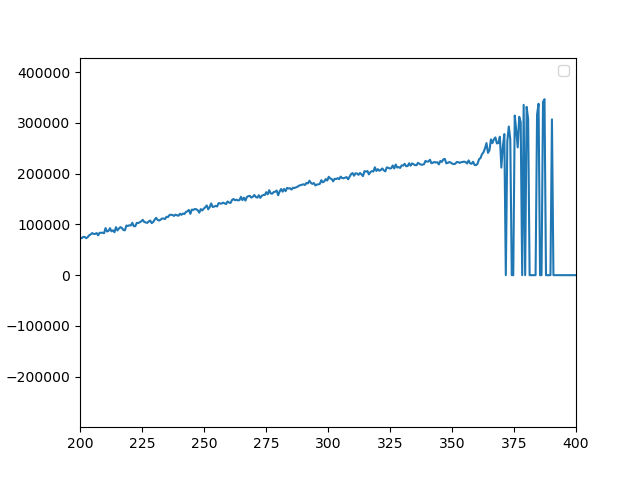

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


330.3 348.3
215964.0 221361.0


In [20]:
%matplotlib notebook
plt.plot(coord, velos)
a = 550
b = 580
print(coord[a], coord[b])
print(velos[a], velos[b])
#M = np.nanmean(velos[a : b])
#plt.axhline(y=np.nanmean(velos[a : b]), label= M)
plt.xlim((200, 400))
#plt.ylim((-200, 400000))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


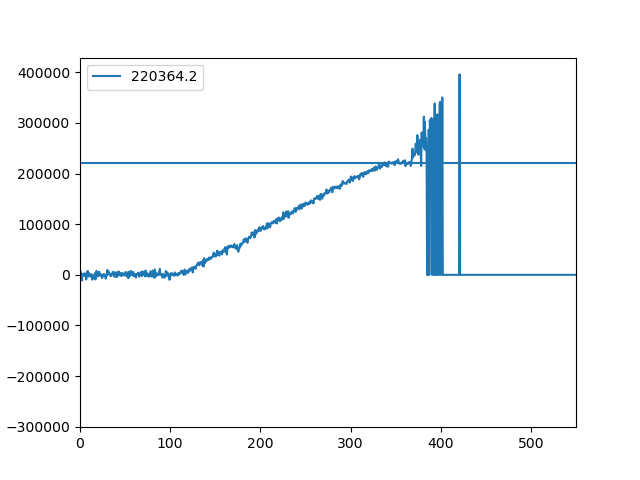

336.3 354.3
216909.0 220747.0


In [14]:
%matplotlib notebook
plt.plot(coord1, velos1)
a = 560
b = 590
print(coord1[a], coord1[b])
print(velos1[a], velos1[b])
M = np.nanmean(velos1[a : b])
plt.axhline(y=np.nanmean(velos1[a : b]), label= M)
plt.xlim((0, 550))
plt.legend()
plt.show()